# Mini Project: Logistic Regression

Logistic Regression models the probability that a given input belongs to a certain class. It's suitable when the target variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No), although it can also be extended for problems with more than two classes. The key idea behind logistic regression is to model the relationship between the input variables (features) and the probability of the outcome.

In logistic regression, the linear combination of input features is transformed using a logistic function (also known as the sigmoid function), which ensures that the output is between 0 and 1. This output can be interpreted as the probability of the instance belonging to a particular class.

**Advantages of Logistic Regression:**

1. **Simple and Interpretable:** Logistic regression is a straightforward algorithm that's relatively easy to understand and interpret. The output is the probability of belonging to a certain class, and the coefficients associated with each feature provide insights into feature importance.

2. **Efficient for Small Datasets:** It works well with small datasets where the number of samples is not very large. It's less prone to overfitting in such cases compared to complex models.

3. **Works Well for Linearly Separable Data:** When the classes are separable by a linear decision boundary, logistic regression can perform quite well.

4. **Good Starting Point:** Logistic regression is often used as a starting point for understanding a classification problem. It can serve as a baseline model against which more complex algorithms can be compared.

5. **Regularization:** Logistic regression can be regularized to prevent overfitting. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can be applied to control the complexity of the model.

6. **Probability Estimation:** Logistic regression not only provides class predictions but also outputs the probability of the prediction. This can be useful for decision-making in cases where the cost of misclassification varies.

However, it's important to note that logistic regression also has its limitations. It assumes a linear relationship between features and the log-odds of the target variable, which might not be suitable for highly complex relationships. Additionally, it might struggle with handling non-linear data without feature transformations. In such cases, more advanced techniques like decision trees, random forests, or neural networks might be more appropriate.

In this project you'll get some experience building a logistic regression model for the [Wisconsin Breast Cancer Detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Note, the task of training a logistic regression model has largely been asbtracted away by libraries like Scikit-Learn. In this mini-project we'll focus more on model evaluation and interpretation.  


First, let's import all the libraries we'll be using.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Logistic Regression, like many statistical methods, comes with certain assumptions about the underlying data. Here are the main assumptions associated with logistic regression:

1. **Binary Outcome:** Logistic regression is designed for binary classification problems, where the dependent variable (target) should have two categories or levels. If you have a multi-class problem, you would typically use multinomial logistic regression or other appropriate techniques.

2. **Independence of Observations:** The observations (samples) should be independent of each other. This means that the outcome of one observation should not be influenced by the outcome of another observation. This assumption is often met when the data is collected using random sampling or experimental designs.

3. **Linearity of Log-Odds:** The relationship between the log-odds of the outcome and the predictors should be linear. In other words, the log-odds of the outcome variable should change linearly with changes in the predictor variables. This assumption can be checked by examining scatter plots and residual plots.

4. **No Multicollinearity:** There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

5. **Large Sample Size:** While logistic regression is generally more robust to violations of assumptions compared to linear regression, having a reasonably large sample size helps in obtaining stable and reliable parameter estimates.

6. **Sufficient Variability in the Outcome:** The outcome variable should exhibit variation across different values of the predictor variables. If all values of a predictor are the same within a level of the outcome, the model may not be able to estimate the effect of that predictor.

7. **No Extreme Outliers:** Extreme outliers can influence the estimation of coefficients and affect the overall performance of the model. It's a good practice to identify and handle outliers before fitting the model.

It's important to note that while these assumptions are important to understand, logistic regression is often used in real-world scenarios where some of these assumptions may not be perfectly met. In such cases, it's crucial to assess the impact of potential violations on the model's results and make informed decisions about the model's suitability and reliability.

If the assumptions are significantly violated, it might be worth considering other techniques like decision trees, random forests, or support vector machines, which might be more robust to certain types of data characteristics. One of the best ways to see if logistic regression is suitable for a problem is to simply train a logistic regression model and evaluate it on test data.

Here are your tasks:

1. Load the [breast cancer data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [161]:
# Load data and split into feature and target variables
data = load_breast_cancer(as_frame = True)
print(data.data.head())
print(data.feature_names)
print(data.target_names)
print(data.DESCR)
X = data.data
y = data.target


   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry'

In [162]:
# View first 5 rows of the data
print(X.head())
print(y.head())

   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [163]:
# How frequently does the positive target occur?
print(y.value_counts())

target
1    357
0    212
Name: count, dtype: int64


The positive target (target = 1) occurs 357 times, out of 569 instances.

In [164]:
# Generate summary statistics for the data
print(data.data.describe())

       mean radius  mean texture  ...  worst symmetry  worst fractal dimension
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]


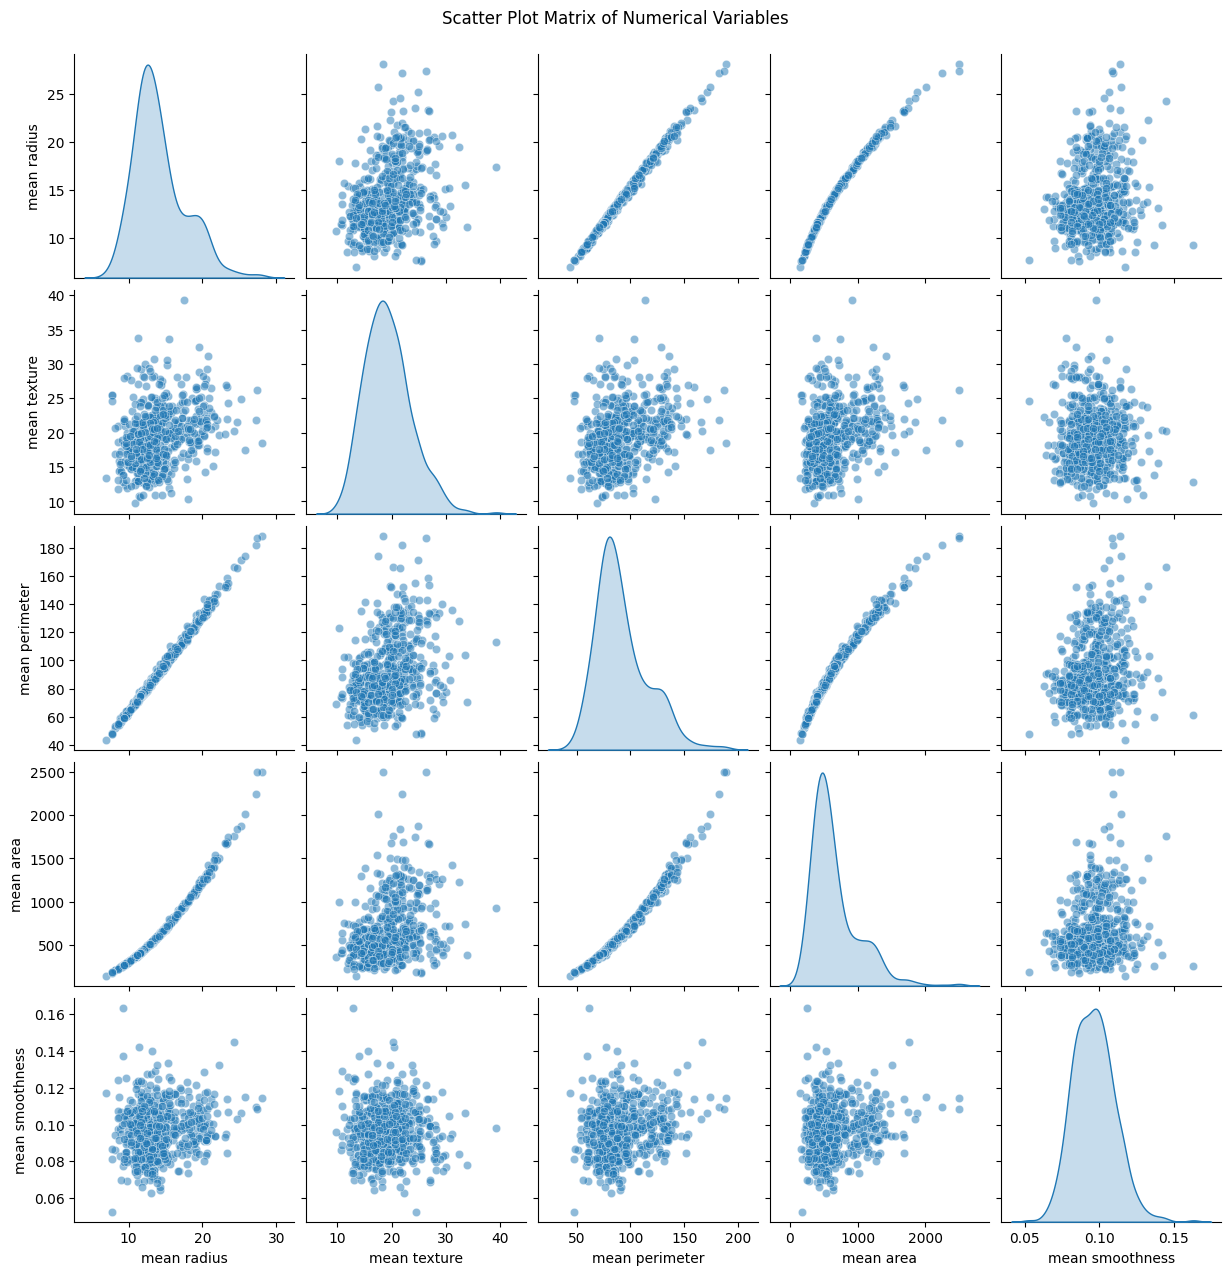

In [165]:
# Create a pairplot for the first few features
sns.pairplot(X.iloc[:, :5], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

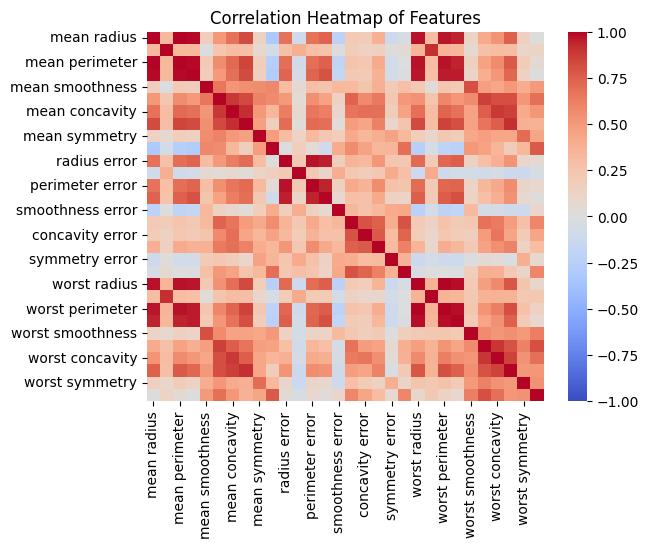

In [166]:
# Create a correlation coefficient heatmap
correlation = X.corr()
sns.heatmap(correlation, cmap = 'coolwarm', vmin = -1, vmax  = 1)
plt.title('Correlation Heatmap of Features')
plt.show()

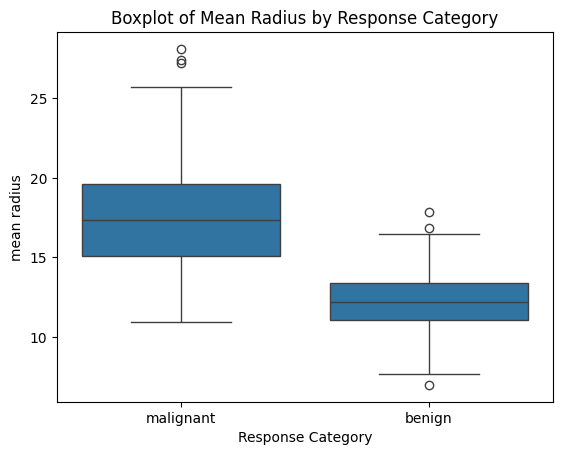

In [167]:
# Create a boxplot for mean radius by target type
sns.boxplot(x = data.target, y = data.data['mean radius'])
plt.title('Boxplot of Mean Radius by Response Category')
plt.xlabel('Response Category')
plt.xticks([0,1] , data.target_names)
plt.show()

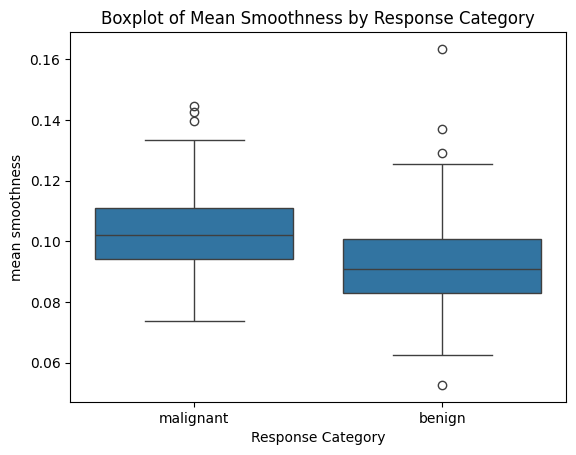

In [168]:
sns.boxplot(x = data.target, y = data.data['mean smoothness'])
plt.title('Boxplot of Mean Smoothness by Response Category')
plt.xlabel('Response Category')
plt.xticks([0,1] , data.target_names)
plt.show()

With a better feel for the data, it's time to attempt to build a logistic regression model.

1. Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and test sets for the data.
2. Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

In [169]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
print([X_train.shape ,X_test.shape])

[(455, 30), (114, 30)]


In [170]:
# Build and train logistic regression model
lr = LogisticRegression(max_iter = 250, solver= 'liblinear').fit(X_train, y_train)
lr
print(lr.coef_)
print(sum(abs(lr.predict(X_train)-y_train))/len(y_train))
print(sum(abs(lr.predict(X_test)-y_test))/len(y_test))

[[ 2.06135813e+00  1.08092386e-01 -6.52743174e-02 -7.53601205e-04
  -1.47098107e-01 -4.03683252e-01 -6.20608421e-01 -2.94287078e-01
  -1.87091074e-01 -2.42272027e-02  4.14457645e-02  1.25890159e+00
   3.86693884e-02 -9.68537518e-02 -1.84914230e-02 -1.73215893e-02
  -6.84385548e-02 -3.50707641e-02 -2.13784470e-02  2.08799974e-03
   1.40767691e+00 -3.37849692e-01 -1.35700113e-01 -2.63462102e-02
  -2.85673975e-01 -1.16394941e+00 -1.57840852e+00 -5.72893727e-01
  -5.47068449e-01 -1.20665663e-01]]
0.04395604395604396
0.05263157894736842


As you can see, training a logistic regression model is simple. The more important task is evaluating the model and determining if it's any good. For classification problems, a good starting point for model evaluation is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed breakdown of how well a model's predictions align with the actual outcomes in a binary classification problem. It's particularly useful for understanding the types of errors a model is making.

A confusion matrix is typically presented as a table with four entries:

- **True Positives (TP):** The number of instances that were correctly predicted as positive (belonging to the positive class).

- **True Negatives (TN):** The number of instances that were correctly predicted as negative (belonging to the negative class).

- **False Positives (FP):** Also known as a Type I error. The number of instances that were predicted as positive but actually belong to the negative class.

- **False Negatives (FN):** Also known as a Type II error. The number of instances that were predicted as negative but actually belong to the positive class.

Here's how these four components fit into the confusion matrix:

```
                Predicted
               |  Positive  |  Negative
Actual  Positive |    TP      |    FN
        Negative |    FP      |    TN
```

Each cell of the confusion matrix represents a specific classification outcome. The goal is to have as many instances as possible in the TP and TN cells, and as few as possible in the FP and FN cells.

From the confusion matrix, several evaluation metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** The proportion of correctly predicted positive instances out of all predicted positive instances. It measures the model's ability to avoid false positives.

   `Precision = TP / (TP + FP)`

- **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture all positive instances.

   `Recall = TP / (TP + FN)`

- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives.

   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

Confusion matrices provide valuable insights into the strengths and weaknesses of a classification model. They allow you to understand where the model is making mistakes and guide further improvements or adjustments.

Here are your tasks:

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

Note, the macro average in the report calculates the metrics independently for each class and then takes the average across all classes. In other words, it treats all classes equally, regardless of their frequency in the dataset. This can be useful when you want to assess the model's overall performance without being biased by the class imbalances.

The weighted average in the report, on the other hand, calculates the metrics for each class and then takes the average, weighted by the number of true instances for each class. This gives more weight to classes with more instances, which can be particularly useful in imbalanced datasets where some classes might have much fewer instances than others.

In [171]:
# Evaluate the model
test_predictions = lr.predict(X_test)
sum(abs(test_predictions - y_test)) / len(y_test)

0.05263157894736842

In [172]:
# Generate a confusion matrix
conf_mat = confusion_matrix(y_test, test_predictions)
print(conf_mat)

[[39  6]
 [ 0 69]]


In [173]:
TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[1,0]
FN = conf_mat[0,1]

print(f'True Positives: {TP}, True Negatives: {TN}, False Positives: {FP}, False Negatives: {FN}')

accuracy = (TP+TN)/(TP+TN+FP+FN)
print(f'Accuracy (overall ability to predict correctly) is : {accuracy:.2f}')
print(1-accuracy)
precision = TP/(TP+FP)
print(f'Precision (ability to predict true positives) is : {precision:.2f}')

True Positives: 39, True Negatives: 69, False Positives: 0, False Negatives: 6
Accuracy (overall ability to predict correctly) is : 0.95
0.052631578947368474
Precision (ability to predict true positives) is : 1.00


In [174]:
# Generate a classification report
class_report = classification_report(y_test, test_predictions, target_names=data.target_names)
print(class_report)

              precision    recall  f1-score   support

   malignant       1.00      0.87      0.93        45
      benign       0.92      1.00      0.96        69

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Feature importance refers to the process of determining and quantifying the contribution of each feature (also known as predictor variable or attribute) in a machine learning model towards making accurate predictions. It helps in understanding which features have the most significant impact on the model's output and can be crucial for interpreting and explaining the model's behavior.

In logistic regression models, you can calculate feature importance by examining the coefficients associated with each feature. These coefficients indicate the change in the log-odds of the target variable for a one-unit change in the corresponding feature, while keeping other features constant. The magnitude of the coefficient reflects the strength of the impact that the feature has on the predicted outcome.

The magnitude of the coefficients indicates the importance of each feature. Larger magnitudes imply a stronger impact on the predicted probability of the positive class.

**Positive Coefficient**: An increase in the feature value leads to an increase in the log-odds of the positive class, implying a higher probability of belonging to the positive class.

**Negative Coefficient**: An increase in the feature value leads to a decrease in the log-odds of the positive class, implying a lower probability of belonging to the positive class.

Remember that the scale of the features matters when interpreting coefficients. If features are on different scales, their coefficients won't be directly comparable. This is where normalization can be helpful. Also, keep in mind that this interpretation assumes a linear relationship between the features and the log-odds of the target variable. If your logistic regression model includes interactions or polynomial terms, the interpretation can become more complex. Additionally, be cautious about interpreting coefficients as causal relationships, as logistic regression only captures associations, not causal effects.

Here are your tasks:

1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [175]:
# Extract coefficients
print("Coefficients of the logistic regression model are:")
print(lr.coef_)

Coefficients of the logistic regression model are:
[[ 2.06135813e+00  1.08092386e-01 -6.52743174e-02 -7.53601205e-04
  -1.47098107e-01 -4.03683252e-01 -6.20608421e-01 -2.94287078e-01
  -1.87091074e-01 -2.42272027e-02  4.14457645e-02  1.25890159e+00
   3.86693884e-02 -9.68537518e-02 -1.84914230e-02 -1.73215893e-02
  -6.84385548e-02 -3.50707641e-02 -2.13784470e-02  2.08799974e-03
   1.40767691e+00 -3.37849692e-01 -1.35700113e-01 -2.63462102e-02
  -2.85673975e-01 -1.16394941e+00 -1.57840852e+00 -5.72893727e-01
  -5.47068449e-01 -1.20665663e-01]]


In [176]:
# Normalize the coefficients by the standard deviation
standard_dev_X = X.std()
normalized_coef = lr.coef_ / standard_dev_X.values
print("Coefficients normalized by standard deviation of the corresponding input variable:")
print(normalized_coef)

Coefficients normalized by standard deviation of the corresponding input variable:
[[ 5.84940287e-01  2.51317106e-02 -2.68629854e-03 -2.14143492e-06
  -1.04590989e+01 -7.64366921e+00 -7.78487093e+00 -7.58416242e+00
  -6.82458430e+00 -3.43143879e+00  1.49454964e-01  2.28207244e+00
   1.91257023e-02 -2.12907476e-03 -6.15863863e+00 -9.67244575e-01
  -2.26722381e+00 -5.68381576e+00 -2.58619479e+00  7.89094385e-01
   2.91249027e-01 -5.49683584e-02 -4.03838828e-03 -4.62736218e-05
  -1.25117643e+01 -7.39783516e+00 -7.56579489e+00 -8.71555336e+00
  -8.84258676e+00 -6.68090788e+00]]


In [177]:
# Sort feature names and coefficients by absolute value of coefficients

print(type(normalized_coef))
print(type(normalized_coef[0]))
print(normalized_coef.shape)
print(normalized_coef[0].shape)
sorted_indices = np.argsort(abs(normalized_coef[0]))[::-1] #reverse order (decreasing)
sorted_feature_names = np.array(data.feature_names)[sorted_indices]
sorted_coefficients = normalized_coef[0][sorted_indices]

sorted_df  = pd.DataFrame(sorted_feature_names,sorted_coefficients, columns=['Feature'])
sorted_df.index.name = 'Coefficient'
print(sorted_df)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1, 30)
(30,)
                             Feature
Coefficient                         
-12.511764          worst smoothness
-10.459099           mean smoothness
-8.842587             worst symmetry
-8.715553       worst concave points
-7.784871             mean concavity
-7.643669           mean compactness
-7.584162        mean concave points
-7.565795            worst concavity
-7.397835          worst compactness
-6.824584              mean symmetry
-6.680908    worst fractal dimension
-6.158639           smoothness error
-5.683816       concave points error
-3.431439     mean fractal dimension
-2.586195             symmetry error
 2.282072              texture error
-2.267224            concavity error
-0.967245          compactness error
 0.789094    fractal dimension error
 0.584940                mean radius
 0.291249               worst radius
 0.149455               radius error
-0.054968              worst texture
 0.025132    

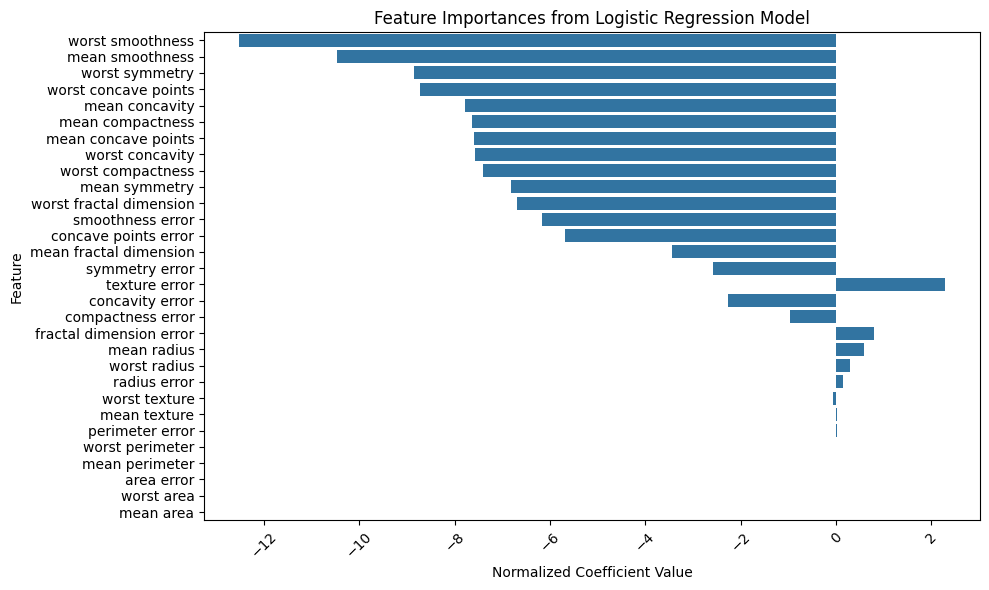

In [178]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x = sorted_df.index, y = sorted_df['Feature'])
plt.title('Feature Importances from Logistic Regression Model')
plt.xlabel('Normalized Coefficient Value')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the plot above, the most important predictor seems to be mean radius. 

In [179]:
#Trying to do the same analysis using statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod import families

# Ensure the data is in the correct format for statsmodels
X_trainglm = sm.add_constant(X_train)  # Add a constant term for the intercept
y_trainglm = y_train.astype(int)  # Ensure target is in integer format for statsmodels     

print(X_trainglm.describe())

# Convert the data into a DataFrame suitable for statsmodels
dataglm = pd.DataFrame(X_trainglm, columns=data.feature_names)
dataglm['target'] = y_trainglm 
print(dataglm.columns)    


       const  mean radius  ...  worst symmetry  worst fractal dimension
count  455.0   455.000000  ...      455.000000               455.000000
mean     1.0    14.142644  ...        0.290115                 0.084244
std      0.0     3.493656  ...        0.060513                 0.018717
min      1.0     6.981000  ...        0.156500                 0.055040
25%      1.0    11.740000  ...        0.252000                 0.071370
50%      1.0    13.340000  ...        0.282600                 0.080090
75%      1.0    15.755000  ...        0.317550                 0.092055
max      1.0    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'c

In [180]:
# Write formula for the logistic regression model using statsmodels

# Need to rename columns to avoid spaces and ensure compatibility with statsmodels
dataglm.columns = [col.replace(' ', '_').lower() for col in dataglm.columns]

formula = 'target ~ ' + ' + '.join(dataglm.columns[:-1])
print(formula)



target ~ mean_radius + mean_texture + mean_perimeter + mean_area + mean_smoothness + mean_compactness + mean_concavity + mean_concave_points + mean_symmetry + mean_fractal_dimension + radius_error + texture_error + perimeter_error + area_error + smoothness_error + compactness_error + concavity_error + concave_points_error + symmetry_error + fractal_dimension_error + worst_radius + worst_texture + worst_perimeter + worst_area + worst_smoothness + worst_compactness + worst_concavity + worst_concave_points + worst_symmetry + worst_fractal_dimension


In [181]:
# Fit the logistic regression model using statsmodels

glm_model = smf.glm(formula=formula, data=dataglm, family=families.Binomial())
glm_results = glm_model.fit()

mcfadden_r_squared = 1 - (glm_results.llf / glm_results.llnull)
print(glm_results.llnull)
print(glm_results.llf)

print("\n--- GLM (Binomial/Logistic Regression) Model Summary ---")
print(glm_results.summary())

# Accessing specific components for GLM
# Calculate McFadden's Pseudo R-squared manually using log-likelihoods
mcfadden_r_squared = 1 - (glm_results.llf / glm_results.llnull)
print("\n--- GLM - Accessing Specific Components ---")
print(f"Pseudo R-squared (McFadden's): {mcfadden_r_squared:.4f}")
print(f"Coefficients:\n{glm_results.params}")
print(f"P-values:\n{glm_results.pvalues}")
print(f"Standard Errors:\n{glm_results.bse}")
print(f"Confidence Intervals (95%):\n{glm_results.conf_int(alpha=0.05)}")
print("-" * 50)

-299.09774066993185
nan

--- GLM (Binomial/Logistic Regression) Model Summary ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  455
Model:                            GLM   Df Residuals:                      424
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 13 Jul 2025   Deviance:                   4.7639e-09
Time:                        17:28:56   Pearson chi2:                 2.38e-09
No. Iterations:                    28   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

/Users/micoltresoldi/Desktop/Python Start/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/micoltresoldi/Desktop/Python Start/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/micoltresoldi/Desktop/Python Start/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/micoltresoldi/Desktop/Python Start/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn

The loglikelihood is NaN possibly because of perfect separation of the data, which makes the estimation of the coefficients very unstable (in fact the SEs are enourmous). To check this, we plot the predicted probabilities. We expect these to be either 0 or 1, which is the indication of perfect separation of the target values by a linear combination of the input variables.

/Users/micoltresoldi/Desktop/Python Start/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


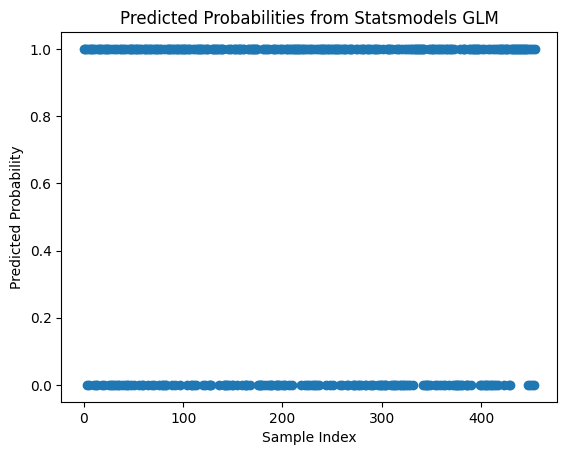

In [182]:

predicted_probabilities_statsmodels = glm_results.predict(dataglm)

plt.scatter(range(len(predicted_probabilities_statsmodels)), predicted_probabilities_statsmodels, label='Predicted Probabilities (sklearn)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities from Statsmodels GLM')
plt.show()

Now we wonder about the resuts we got using sklearn library. After reading some documentation, we understand this method automatically applies some regularization, which would prevent the infinite issue problem. Still we want to double check, so we run the LR from sklearn with C = 1e9 which is equivalent to no regularization. 

In [183]:
# Build and train logistic regression model
lr = LogisticRegression(max_iter = 1000, solver= 'liblinear',  C=1e11).fit(X_train, y_train)
lr
print(lr.coef_)

[[ 5.30526637  0.36582721 -0.63223586 -0.00844332 -0.73855737 -1.10797768
  -2.0549131  -1.22806541 -0.97543583 -0.01919823  0.08364247  4.43600978
  -1.0170532  -0.10119489 -0.09756509  0.41630709  0.2654736  -0.11794142
  -0.01392957  0.08693103  0.83968761 -0.76342277  0.1655155  -0.03168472
  -1.50348126 -2.87104014 -4.62604274 -2.45246207 -2.55334546 -0.28097465]]


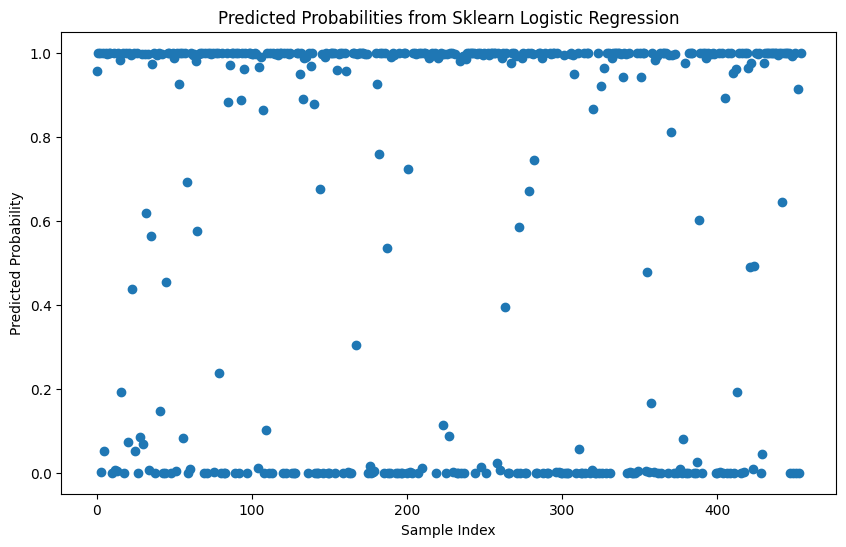

In [184]:

predicted_probabilities_sklearn = lr.predict_proba(X_train)[:, 1]
plt.figure(figsize=(10, 6)) 
plt.scatter(range(len(predicted_probabilities_sklearn)), predicted_probabilities_sklearn, label='Predicted Probabilities (sklearn)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities from Sklearn Logistic Regression')
plt.show()  

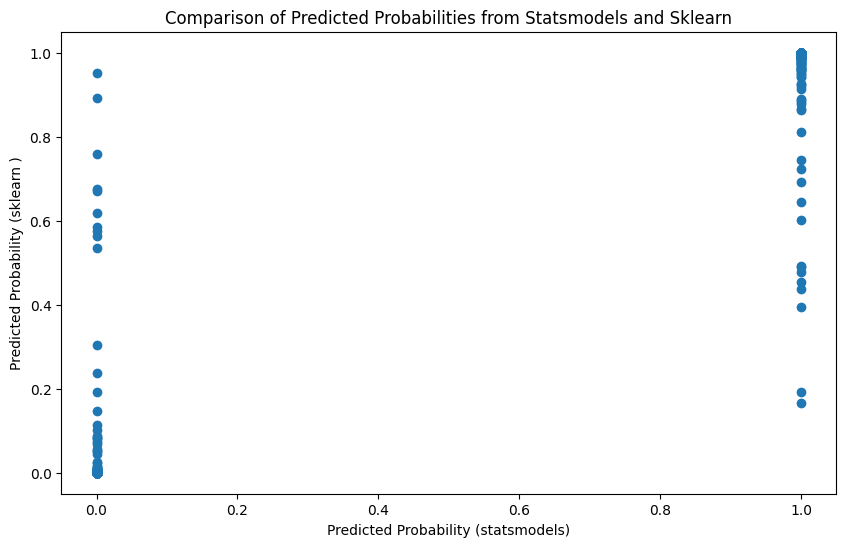

In [185]:
plt.figure(figsize=(10, 6))
plt.scatter(predicted_probabilities_statsmodels, predicted_probabilities_sklearn, label='Predicted Probabilities (sklearn)')
plt.xlabel('Predicted Probability (statsmodels)')
plt.ylabel('Predicted Probability (sklearn )')
plt.title('Comparison of Predicted Probabilities from Statsmodels and Sklearn')
plt.show()

In [186]:
sum((predicted_probabilities_sklearn<0.999) & (predicted_probabilities_sklearn>0.001))/ len(predicted_probabilities_sklearn)

np.float64(0.4043956043956044)

In [187]:
sum((predicted_probabilities_statsmodels<0.999) & (predicted_probabilities_statsmodels>0.001))/ len(predicted_probabilities_statsmodels)


0.0

What we learnt from this exercise, is that sklearn will apply some regularization regardless of what the user will ask. This allows it to reach finite estimates for the coeffiecients, and obtain pred probabilities strictly within (0,1) -- in other words, it does not accept perfect separation as a possible estimation outcome, so it pulls the estimates away from it (which would require beta ~ inf). This in a sense, relates to the attitude of not trusting the training data too much, and so the regularization acts as a prevention from overfitting: if I see perfect separation in the sample data, I won't necessarily predict separation because that might be overfitting. 

In [ ]:
# Evaluate the SKLEARN model on test data
test_predictions = lr.predict(X_test)
sum(abs(test_predictions - y_test)) / len(y_test)

0.043859649122807015

In [207]:
# Evaluate the STATSMODELS model on test data
test_dataglm = sm.add_constant(X_test)  # Add a constant term for the intercept

test_dataglm['target'] = y_test.astype(int)  # Ensure target is in integer format for statsmodels

test_dataglm.columns = [col.replace(' ', '_').lower() for col in test_dataglm.columns]
print(test_dataglm.columns)

test_predictions_statsmodels = glm_results.predict(test_dataglm)        

sum(abs(test_predictions_statsmodels  - y_test)) / len(y_test)

Index(['const', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')


/Users/micoltresoldi/Desktop/Python Start/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


0.06005725754816554

The error rates on the test set are 4.3 and 6 % respectively, for the SKlearn model and the Statsmodels model. 
Also to be noted, that SKLearn model results could vary significantly depending on the algorithm chosen to solve the opt problem. Unless the number of iterations is high enough. 